# Practice PS07: Outlier analysis

Author: <font color="blue">Leticia Martin Cabrera</font>

E-mail: <font color="blue">leticia.martin03@estudiant.upf.edu</font>

Date: <font color="blue">14/11/2021</font>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import io
import random
import numpy as np

# 1. Dataset

In [3]:
# Leave this code as-is

df = pd.read_csv('data/thyroid.csv', sep=',')

# Add a patient-id as first column
df['id'] = df.index
df = df[['id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'abnormal']]
df['result'] = df['abnormal'].apply(lambda x: 'abnormal' if x == 1 else 'normal')
df.drop(columns=['abnormal'], inplace=True)

# Report
print("Total patients   : %d" % len(df))
print("Normal thyroid   : %d" % len(df[df['result'] == 'normal']))
print("Abnormal thyroid : %d" % len(df[df['result'] == 'abnormal']))
print("Features         : %s" % df.columns.values)

Total patients   : 3772
Normal thyroid   : 3679
Abnormal thyroid : 93
Features         : ['id' 'f1' 'f2' 'f3' 'f4' 'f5' 'f6' 'result']


In [4]:
# print 10 normal thyroid exams
df[df['result'] == 'normal'].head(10)

,id,f1,f2,f3,f4,f5,f6,result
0,0,0.774194,0.001132,0.137571,0.275701,0.295775,0.236066,normal
1,1,0.247312,0.000472,0.279886,0.329439,0.535211,0.173770,normal
2,2,0.494624,0.003585,0.222960,0.233645,0.525822,0.124590,normal
3,3,0.677419,0.001698,0.156546,0.175234,0.333333,0.136066,normal
4,4,0.236559,0.000472,0.241935,0.320093,0.333333,0.247541,normal
5,5,0.731183,0.000472,0.147059,0.196262,0.239437,0.198361,normal
6,6,0.903226,0.000472,0.213472,0.294393,0.399061,0.195082,normal
7,7,0.505376,0.003925,0.185009,0.196262,0.276995,0.177049,normal
8,8,0.709677,0.002453,0.222960,0.198598,0.422535,0.127869,normal
9,9,0.806452,0.000189,0.270398,0.285047,0.511737,0.155738,normal


In [5]:
# print 10 abnormal thyroid exams
df[df['result'] == 'abnormal'].head(10)

,id,f1,f2,f3,f4,f5,f6,result
19,19,0.526882,0.115094,0.086338,0.025701,0.455399,0.014754,abnormal
27,27,0.827957,0.047170,0.080645,0.112150,0.305164,0.095082,abnormal
105,105,0.774194,0.088679,0.099620,0.116822,0.333333,0.091803,abnormal
115,115,0.451613,0.132075,0.042694,0.002103,0.399061,0.001311,abnormal
116,116,0.440860,0.058491,0.071157,0.025701,0.469484,0.014754,abnormal
147,147,0.559140,0.047170,0.033207,0.086449,0.197183,0.101639,abnormal
208,208,0.537634,0.045283,0.033207,0.002336,0.375587,0.001639,abnormal
289,289,0.720430,0.049057,0.023719,0.009346,0.286385,0.009180,abnormal
387,387,0.419355,0.079245,0.014231,0.006542,0.333333,0.005574,abnormal
406,406,0.634409,0.015264,0.166034,0.133178,0.361502,0.096721,abnormal


In [6]:
#print the average value of f1, f2, f3, f4, f5 and f6 for all normal and all abnormal exams
exams_name = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6']
result = ['normal', 'abnormal']
for i in result:
    print("\n#########", i, "exams #########")
    for j in exams_name:
        print("Average of ", j, ":", df[df['result'] == i][j].mean())




######### normal exams #########
Average of  f1 : 0.5435660695548966
Average of  f2 : 0.004755070850877545
Average of  f3 : 0.18935256414565074
Average of  f4 : 0.25273357500134264
Average of  f5 : 0.37641122625945556
Average of  f6 : 0.18049647311503755

######### abnormal exams #########
Average of  f1 : 0.5254942767950536
Average of  f2 : 0.17624832623250744
Average of  f3 : 0.0868886576482774
Average of  f4 : 0.07422118380063042
Average of  f5 : 0.3978999444696881
Average of  f6 : 0.05088436453374494


Observing the means of features we can appreciate that at  f2 and f4 there is significant difference between the means so these are useful for distinguish the case of normal and abnormal thyroids.Moreover,there is a quite difference between the f3 and f6 normal and abnormal means but we can not conclude if these are relevant enough to distinguish both cases.

C:\Users\letic\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\letic\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\letic\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\letic\anaconda3\lib\site-packages\pandas\plotting\_matpl

array([[<AxesSubplot:xlabel='f1', ylabel='f1'>,
        <AxesSubplot:xlabel='f2', ylabel='f1'>,
        <AxesSubplot:xlabel='f3', ylabel='f1'>,
        <AxesSubplot:xlabel='f4', ylabel='f1'>,
        <AxesSubplot:xlabel='f5', ylabel='f1'>,
        <AxesSubplot:xlabel='f6', ylabel='f1'>],
       [<AxesSubplot:xlabel='f1', ylabel='f2'>,
        <AxesSubplot:xlabel='f2', ylabel='f2'>,
        <AxesSubplot:xlabel='f3', ylabel='f2'>,
        <AxesSubplot:xlabel='f4', ylabel='f2'>,
        <AxesSubplot:xlabel='f5', ylabel='f2'>,
        <AxesSubplot:xlabel='f6', ylabel='f2'>],
       [<AxesSubplot:xlabel='f1', ylabel='f3'>,
        <AxesSubplot:xlabel='f2', ylabel='f3'>,
        <AxesSubplot:xlabel='f3', ylabel='f3'>,
        <AxesSubplot:xlabel='f4', ylabel='f3'>,
        <AxesSubplot:xlabel='f5', ylabel='f3'>,
        <AxesSubplot:xlabel='f6', ylabel='f3'>],
       [<AxesSubplot:xlabel='f1', ylabel='f4'>,
        <AxesSubplot:xlabel='f2', ylabel='f4'>,
        <AxesSubplot:xlabel='f3', yla

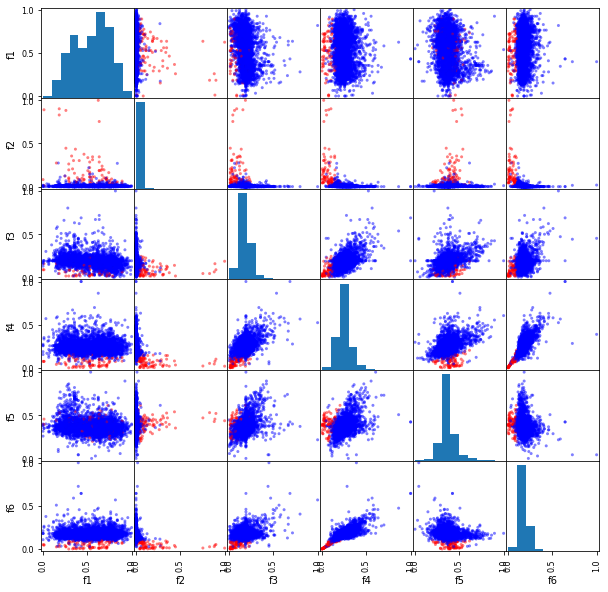

In [7]:
color_code = {'abnormal': 'red', 'normal': 'blue'}

colors = df['result'].apply(lambda x: color_code[x])

pd.plotting.scatter_matrix(df.iloc[:,1:,], c=colors, figsize= (10,10))

In general, we observe the point clouds for abnormal exams show us a different distribution to the normal exams such as the feature f2 compared with the others attributes (2nd plot column), where we can apprecciate while the blue points are distributed in along a column, the red points are practically drawing a row. 

# 1. Create isolation tree

## 1.1. Random dimension and random split

In [8]:
#Create the function pick_random_dimension
def pick_random_dimension(df, columns_to_ignore):
    df1 = df.drop(columns_to_ignore, axis=1)
    return random.choice(df1.columns)

#Testing the function
columns_to_ignore = ['id', 'result']
print("Test 1: ", pick_random_dimension(df, columns_to_ignore))
print("Test 2: ", pick_random_dimension(df, columns_to_ignore))

Test 1:  f3
Test 2:  f4


In [9]:
#Create the function pick_random_split
def pick_random_split(df, dimension):
    return random.uniform(np.min(df[dimension]),np.max(df[dimension]))

#Testing the function
dim1 = pick_random_dimension(df, columns_to_ignore) #dimension of the first test of the function 
dim2 = pick_random_dimension(df, columns_to_ignore) #dimension of the second test of the function 
print("Split the dimension ", dim1, " at ", pick_random_split(df, dim1))
print("Split the dimension ", dim2, " at ", pick_random_split(df, dim2))


Split the dimension  f2  at  0.2846117147589369
Split the dimension  f5  at  0.9831754325086286


## 1.2. Implement split data into two

In [10]:
#Create the function split_dataset
def split_dataset(df, dimension, split):
    return df[df[dimension] <= split],df[df[dimension] > split] 


In [11]:
#testing the function the split_dataset 
dim = 'f1' #dimension 
cutoff = 0.4 # cut-off
(left, right) = split_dataset(df, dim, cutoff)

print("Printing the left part where all rows have ", dim, "<=", cutoff)
left

Printing the left part where all rows have  f1 <= 0.4


,id,f1,f2,f3,f4,f5,f6,result
1,1,0.247312,0.000472,0.279886,0.329439,0.535211,0.173770,normal
4,4,0.236559,0.000472,0.241935,0.320093,0.333333,0.247541,normal
11,11,0.182796,0.000189,0.213472,0.224299,0.309859,0.185246,normal
28,28,0.279570,0.000943,0.118596,0.247664,0.281690,0.221311,normal
30,30,0.290323,0.003566,0.190702,0.255093,0.375587,0.180443,normal
...,...,...,...,...,...,...,...,...
3757,3757,0.333333,0.002642,0.190702,0.247664,0.450704,0.150820,normal
3758,3758,0.376344,0.001396,0.137571,0.163551,0.145540,0.234426,normal
3760,3760,0.387097,0.003925,0.222960,0.408879,0.596244,0.196721,normal
3761,3761,0.268817,0.000151,0.156546,0.401869,0.488263,0.229508,normal


In [12]:
print("Printing the right part where all rows have ", dim, ">", cutoff)
right

Printing the right part where all rows have  f1 > 0.4


,id,f1,f2,f3,f4,f5,f6,result
0,0,0.774194,0.001132,0.137571,0.275701,0.295775,0.236066,normal
2,2,0.494624,0.003585,0.222960,0.233645,0.525822,0.124590,normal
3,3,0.677419,0.001698,0.156546,0.175234,0.333333,0.136066,normal
5,5,0.731183,0.000472,0.147059,0.196262,0.239437,0.198361,normal
6,6,0.903226,0.000472,0.213472,0.294393,0.399061,0.195082,normal
...,...,...,...,...,...,...,...,...
3767,3767,0.817204,0.000113,0.190702,0.287383,0.413146,0.188525,normal
3768,3768,0.430108,0.002453,0.232448,0.287383,0.446009,0.175410,normal
3769,3769,0.935484,0.024528,0.160342,0.282710,0.375587,0.200000,normal
3770,3770,0.677419,0.001472,0.190702,0.242991,0.323944,0.195082,normal


## 1.3. Create one isolation tree

In [13]:
#Create the function isolation_tree
def isolation_tree(data, columns_to_ignore, min_items):
    tree = {}
    if len(data) <= min_items:
        return {"contents": data}
    else:
        # Selects a random dimension from the data, ignoring the columns_to_ignore
        dim = pick_random_dimension(data, columns_to_ignore)
        
        #Selects a random split point along that dimension
        cutoff = pick_random_split(data, dim)
        
        #Split database: the left part have dimension <= cutoff and  the right part have dimension > cutoff
        (left, right) = split_dataset(data, dim, cutoff)
        
        #Apply isolation tree in both database (left and right)
        left = isolation_tree(left, columns_to_ignore, min_items)
        right = isolation_tree(right, columns_to_ignore, min_items)
        
        #Add variables to dictionary
        tree = {"left": left, "right": right, "dimension": dim, "split": cutoff}
        
        #return the isolation_tree
        return tree 

In [14]:
# Leave this code as-is
mytree = isolation_tree(df, ['id', 'result'], 2000)

In [15]:
# Leave this code as-is

class tree_drawing(object):
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

    def __str__(self, label='', level=0):
        ret = "-" * level + label + ":" + repr(self.value)+"\n"
        if self.left:
            ret += self.left.__str__("L", level+1)
        if self.right:
            ret += self.right.__str__("R", level+1)
        return ret

    def __repr__(self):
        return self.value
    
def tree_to_nodes(tree):
    if 'contents' in tree:
        data = tree['contents']
        normal_count = len(data[data['result'] == 'normal'])
        abnormal_count = len(data[data['result'] == 'abnormal'])
        description = "external node: %d normal + %d abnormal" % (normal_count, abnormal_count)
        return tree_drawing(description)
    else:
        left = tree['left']
        right = tree['right']
        description = 'internal node: ' + tree['dimension'] + '<=' + ("%.2f" % tree['split'])
        n = tree_drawing(description, tree_to_nodes(left), tree_to_nodes(right) )
        return n

In [16]:
print(tree_to_nodes(mytree))

:'internal node: f4<=0.35'
-L:'internal node: f2<=0.16'
--L:'internal node: f3<=0.28'
---L:'internal node: f2<=0.15'
----L:'internal node: f2<=0.07'
-----L:'internal node: f1<=0.27'
------L:'external node: 359 normal + 1 abnormal'
------R:'internal node: f3<=0.05'
-------L:'external node: 46 normal + 11 abnormal'
-------R:'internal node: f2<=0.01'
--------L:'internal node: f2<=0.01'
---------L:'internal node: f6<=0.25'
----------L:'internal node: f6<=0.06'
-----------L:'external node: 3 normal + 0 abnormal'
-----------R:'internal node: f6<=0.13'
------------L:'external node: 143 normal + 0 abnormal'
------------R:'internal node: f1<=0.56'
-------------L:'external node: 936 normal + 0 abnormal'
-------------R:'external node: 1290 normal + 0 abnormal'
----------R:'external node: 84 normal + 0 abnormal'
---------R:'external node: 192 normal + 1 abnormal'
--------R:'external node: 179 normal + 21 abnormal'
-----R:'external node: 10 normal + 25 abnormal'
----R:'external node: 0 normal + 2 a

In [17]:
#Create a function get_max_tree_depth hat returns the maximum depth of a tree
def get_max_tree_depth(tree):
    if 'contents' in tree:
        return 0
    else:
        lDepth = get_max_tree_depth(tree['left'])
        rDepth = get_max_tree_depth(tree['right'])
        return max(lDepth,rDepth) +1


In [18]:
#Calculate the maximum depth of mytree
print("The maximum depth of mytree is:", get_max_tree_depth(mytree))

The maximum depth of mytree is: 13


# 2. Create isolation forests and find depth of items




## 2.1. Create an isolation forest

In [19]:
#Create a function isolation_forest that creates an array of num_trees isolation trees
def isolation_forest(df, columns_to_ignore, min_items, num_trees):
    forest = []
    for i in range(num_trees):
        forest.append(isolation_tree(df, columns_to_ignore, min_items))
    return forest

In [20]:
# Leave this code as-is

min_items = 10
num_trees = 20
myforest = isolation_forest(df, ['id', 'result'], min_items, num_trees)
print("The forest has %d trees" % len(myforest))

The forest has 20 trees


In [21]:
# Leave this code as-is

for i in range(0, 3):
    print("Tree number %d" % i)
    print(tree_to_nodes(myforest[i]))
    print()

Tree number 0
:'internal node: f5<=0.78'
-L:'internal node: f3<=0.72'
--L:'internal node: f4<=0.21'
---L:'internal node: f4<=0.19'
----L:'internal node: f2<=0.09'
-----L:'internal node: f6<=0.26'
------L:'internal node: f6<=0.06'
-------L:'internal node: f3<=0.44'
--------L:'internal node: f1<=0.56'
---------L:'internal node: f1<=0.03'
----------L:'external node: 0 normal + 2 abnormal'
----------R:'internal node: f3<=0.03'
-----------L:'external node: 0 normal + 3 abnormal'
-----------R:'external node: 6 normal + 3 abnormal'
---------R:'external node: 0 normal + 4 abnormal'
--------R:'external node: 2 normal + 0 abnormal'
-------R:'internal node: f1<=0.18'
--------L:'internal node: f6<=0.20'
---------L:'internal node: f6<=0.14'
----------L:'external node: 10 normal + 0 abnormal'
----------R:'external node: 7 normal + 0 abnormal'
---------R:'external node: 1 normal + 0 abnormal'
--------R:'internal node: f2<=0.02'
---------L:'internal node: f5<=0.33'
----------L:'internal node: f2<=0.00

## 2.2. Find the average depth of an item

In [22]:
# Leave this code as-is

def find_element_depth_aux(tree, column_name, column_value, depth):
    
    if 'contents' in tree:
        # We are in a leaf node
        
        data = tree['contents']
        matching = data[data[column_name] == column_value]
        if len(matching) == 0:
            return None
        elif len(matching) > 1:
            print("Error: multiple elements match your search criterion")
            return None
        else:
            return depth
    else:
        # We are in an internal node
        
        in_left = find_element_depth_aux(tree['left'], column_name, column_value, depth+1)
        if in_left == None:
            in_right = find_element_depth_aux(tree['right'], column_name, column_value, depth+1)
            return in_right
        else:
            return in_left
        
def find_element_depth(tree, column_name, column_value):
    return find_element_depth_aux(tree, column_name, column_value, 0)

In [23]:
# Leave this code as-is

def print_sample_depths(df, sample_size, tested_tree):

    for result in ['normal', 'abnormal']:
        print("Depths for %s items" % result)

        sample = list(df[df['result'] == result]['id'].sample(sample_size))

        max_depth = get_max_tree_depth(tested_tree)
        for random_id in sample:
            print("- id=%d is at depth %d/%d" % (random_id, find_element_depth(tested_tree, "id", random_id), max_depth))
            
    
print("On shallow tree, having maximum depth %d" % get_max_tree_depth(mytree))
print_sample_depths(df, 5, mytree)
print()

print("On first tree of forest, having maximum depth %d" % get_max_tree_depth(myforest[0]))
print_sample_depths(df, 5, myforest[0])
print()


On shallow tree, having maximum depth 13
Depths for normal items
- id=1649 is at depth 13/13
- id=2049 is at depth 13/13
- id=1199 is at depth 13/13
- id=2347 is at depth 13/13
- id=905 is at depth 13/13
Depths for abnormal items
- id=3274 is at depth 5/13
- id=289 is at depth 7/13
- id=3565 is at depth 7/13
- id=3275 is at depth 2/13
- id=1790 is at depth 2/13

On first tree of forest, having maximum depth 76
Depths for normal items
- id=819 is at depth 25/76
- id=610 is at depth 10/76
- id=1829 is at depth 26/76
- id=2139 is at depth 20/76
- id=297 is at depth 30/76
Depths for abnormal items
- id=1867 is at depth 15/76
- id=3274 is at depth 11/76
- id=2588 is at depth 10/76
- id=1336 is at depth 10/76
- id=1633 is at depth 11/76



In general, we can observe that the depth of the normal items is higher than the depth of the abnormal items. This difference is significantly higher on first three of forest while on shallow tree both depths are very close. 

In [24]:
#Write function find_average_depth
def find_average_depth(forest, column_name, value):
    total_depth = 0
    for tree in forest:
        total_depth += find_element_depth(tree, column_name , value)
    return total_depth/len(forest)

In [25]:
# Leave this code as-is

for result in ['normal', 'abnormal']:
    print("Average depths for %s items" % result)
    
    sample = list(df[df['result'] == result]['id'].sample(5))
    
    for random_id in sample:
        print("- id=%d is at average depth %.1f" % (random_id, find_average_depth(myforest, "id", random_id)))
    
    print()

Average depths for normal items
- id=23 is at average depth 21.9
- id=769 is at average depth 24.6
- id=2170 is at average depth 17.2
- id=3033 is at average depth 22.7
- id=534 is at average depth 17.9

Average depths for abnormal items
- id=2703 is at average depth 9.2
- id=3075 is at average depth 9.9
- id=1468 is at average depth 15.0
- id=2131 is at average depth 15.5
- id=2588 is at average depth 9.7



To compute the average, instead of visiting the same tree every time we want to calculate the depth of each element starting from the beginning, it would be better to visit each leaf node, extract its depth, and add it to the depth summation of each element. The pseudocode would be something like this:

#depth_sum = array_zeros(N)  #N is the number of all elements
#for tree in forest:
    #for leaf in tree:
        #for element in leaf:
           #depth_sum[element] += depth(leaf)
#depth_average = depth_sum/number_of_trees

# 3. Find the average depth of a sample of normal and abnormal points

## 3.1. Determine average depths

In [26]:
# Leave this code as-is

abnormal_point_ids = list(df[df['result'] == 'abnormal']['id'].sample(50))
normal_point_ids = list(df[df['result'] == 'normal']['id'].sample(50))

print("Normal point ids   : %s" % normal_point_ids)
print("Abnormal point ids : %s" % abnormal_point_ids)

Normal point ids   : [1707, 3188, 2133, 3021, 931, 1329, 2061, 2081, 179, 2765, 1734, 1956, 2668, 2776, 2772, 542, 2750, 3758, 1122, 3309, 132, 1005, 760, 1823, 1334, 2904, 3159, 20, 1943, 1922, 2058, 3305, 2707, 2973, 1394, 1019, 1592, 2325, 3711, 3430, 2386, 3699, 2662, 1959, 1442, 924, 749, 1351, 1701, 3497]
Abnormal point ids : [3550, 544, 3589, 2515, 3222, 2131, 568, 1465, 2631, 838, 3625, 3275, 1275, 3429, 2236, 105, 2444, 1853, 1500, 2628, 1659, 1269, 406, 1836, 1777, 2209, 115, 2339, 2703, 964, 1620, 3679, 3274, 519, 2382, 1633, 2374, 1907, 1142, 3562, 1057, 1209, 1042, 1706, 2503, 1212, 2645, 429, 1705, 794]


In [27]:
# Leave this code as-is

normal_depths = []
print("Depths of items in the 'normal' sample:")
for i in normal_point_ids:
    depth = find_average_depth(myforest, 'id', i)
    normal_depths.append(depth)
    print(" element id=%d is at average depth %.2f" % (i, depth))
print()

Depths of items in the 'normal' sample:
 element id=1707 is at average depth 18.70
 element id=3188 is at average depth 23.50
 element id=2133 is at average depth 18.50
 element id=3021 is at average depth 23.55
 element id=931 is at average depth 21.30
 element id=1329 is at average depth 24.25
 element id=2061 is at average depth 21.25
 element id=2081 is at average depth 24.20
 element id=179 is at average depth 23.35
 element id=2765 is at average depth 20.60
 element id=1734 is at average depth 48.60
 element id=1956 is at average depth 26.75
 element id=2668 is at average depth 22.50
 element id=2776 is at average depth 23.45
 element id=2772 is at average depth 20.25
 element id=542 is at average depth 24.30
 element id=2750 is at average depth 22.90
 element id=3758 is at average depth 15.60
 element id=1122 is at average depth 17.15
 element id=3309 is at average depth 26.00
 element id=132 is at average depth 20.20
 element id=1005 is at average depth 39.80
 element id=760 is

In [28]:
# Leave this code as-is

abnormal_depths = []
print("Depths of items in the 'abnormal' sample:")
for i in abnormal_point_ids:
    depth = find_average_depth(myforest, 'id', i)
    abnormal_depths.append(depth)
    print(" element id=%d is at average depth %.2f" % (i, depth))
print()

Depths of items in the 'abnormal' sample:
 element id=3550 is at average depth 10.00
 element id=544 is at average depth 11.70
 element id=3589 is at average depth 11.00
 element id=2515 is at average depth 17.15
 element id=3222 is at average depth 11.10
 element id=2131 is at average depth 15.50
 element id=568 is at average depth 11.10
 element id=1465 is at average depth 10.20
 element id=2631 is at average depth 12.55
 element id=838 is at average depth 13.30
 element id=3625 is at average depth 10.05
 element id=3275 is at average depth 8.10
 element id=1275 is at average depth 8.70
 element id=3429 is at average depth 10.35
 element id=2236 is at average depth 12.45
 element id=105 is at average depth 12.35
 element id=2444 is at average depth 7.75
 element id=1853 is at average depth 11.60
 element id=1500 is at average depth 7.90
 element id=2628 is at average depth 7.50
 element id=1659 is at average depth 13.65
 element id=1269 is at average depth 11.45
 element id=406 is at

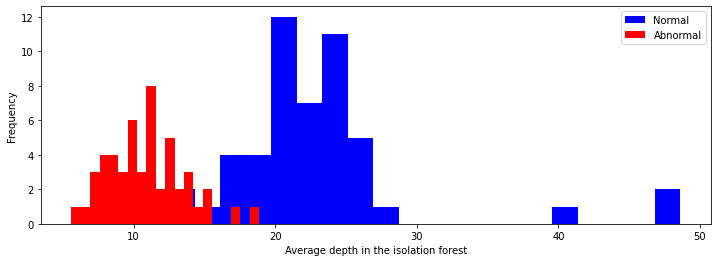

In [29]:
# Leave this code as-is

plt.figure(figsize=(12,4))
plt.hist(normal_depths, label='Normal', bins=20, density=False, color='blue')
plt.hist(abnormal_depths, label='Abnormal', bins=20, density=False, color='red')
plt.xlabel('Average depth in the isolation forest')
plt.ylabel('Frequency')
plt.legend()
plt.show()

As mentioned above, abnormal cases have a shallower depth than normal cases. Also, we can appreciate some outliers fom the normal cases where the depth of these cases are 10,40 and 50. Moreover, the normal cases follow a normal distribution. 

## 3.2. Compute outlier scores and conclude

In [30]:
# Leave this code as-is

# Source: https://stackoverflow.com/a/27683292/1235784

from numpy import euler_gamma
from scipy.special import digamma
def harmonic(s):
    return digamma(s + 1) + euler_gamma

In [31]:
# Leave this code as-is

def outlier_score_factory():
    n = len(df.index)
    c_n = 2.0 * harmonic(n - 1.0) - (2.0 * (n-1)/n)
    return lambda d: 2.0**(-d/c_n)

outlier_score = outlier_score_factory()

normal_scores = [outlier_score(d) for d in normal_depths]
abnormal_scores = [outlier_score(d) for d in abnormal_depths]

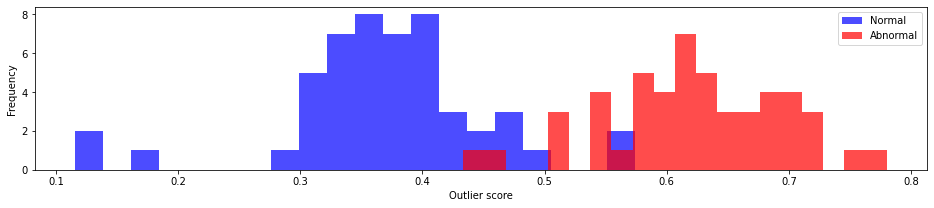

In [32]:
# Leave this code as-is

plt.figure(figsize=(16,3))

# Plot the two histograms; the parameter 'alpha' is the transparency of the bar
plt.hist(normal_scores, label='Normal', bins=20, density=False, color='blue', alpha=0.7)
plt.hist(abnormal_scores, label='Abnormal', bins=20, density=False, color='red', alpha=0.7)

# Draw the axis labels, legend, and display
plt.xlabel('Outlier score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Abnormal patients have higher outlier scores than normal patients. This make sense as abnormal patients have lower average depths.

In [33]:
threshold = 0.5
all_scores = np.concatenate((abnormal_scores, normal_scores))
false_positive = 0
true_positive = 0
true_negative = 0
false_negative = 0
#the N first scores are real abnormal and the rest are real normal exams.
for i in range(len(all_scores)):
    if all_scores[i] < threshold:
        
        if i < len(abnormal_scores):
            false_positive += 1
        else:
            true_positive += 1
    else:
        if i < len(abnormal_scores):
            true_negative += 1
        else:
            false_negative += 1

In [34]:
false_positive_rate = false_positive/len(abnormal_scores)
false_negative_rate = false_negative/len(normal_scores)
print("False positive rate: ", false_positive_rate*100, "%")
print("False negative rate: ", false_negative_rate*100, "%")

False positive rate:  4.0 %
False negative rate:  6.0 %


Thresholds between 0.48 and 0.51, are the ones that performs a better classificator because they have the least false positive and the least false negative rate overall. If we reduce the threshold value, false positive rate falls to 0 but false negative rate increase too much. In contrast, if we increase the threshold value, false negative falls to 0 but false postive rate increase too much.

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>